In [54]:
from vectors import scale
from teapot import *
from draw_model import *
from math import *
from matplotlib import pyplot as plt

In [55]:
def scale2(v):
    return scale(2.0, v)


In [56]:
original_triangles = load_triangles()
scaled_triangles = [
    [scale2(vertex) for vertex in triangle]
    for triangle in original_triangles
]

In [57]:
draw_model(scaled_triangles)

NameError: name 'quit' is not defined

In [ ]:
def translate_left(v):
    return add((-1,0,0), v)

left_triangles = [
    [translate_left(vertex) for vertex in triangle]
    for triangle in original_triangles
]

In [ ]:
scaled_translated_triangles = [
    [translate_left(scale2(v)) for v in triangle]
    for triangle in original_triangles
]

draw_model(scaled_translated_triangles)

NameError: name 'quit' is not defined

In [ ]:
def compose(*args):
    def new_function(input):
        result = input
        for arg in reversed(args):
            result = arg(result)
        return result
    return new_function

def add_one(x):
    return x + 1

def multiply_by_two(x):
    return x * 2

def square(x):
    return x * x

composed_function = compose(square, multiply_by_two, add_one)

print(composed_function(3))

64


In [ ]:
scale2_then_translate_left = compose(translate_left,scale2)

In [ ]:
def polygon_map(transformation, polygons):
    return [
        [transformation(vertex) for vertex in triangle]
        for triangle in polygons
    ]

In [ ]:
def scale_by(scalar):
    def new_function(v):
        return scale(scalar, v)
    return new_function

In [ ]:
def translate_by(vector):
    def new_function(v):
        return add(vector, v)
    return new_function

In [ ]:
def rotate2d(angle, vector):
    l,a = to_polar(vector)
    return to_cartesian((l, a+angle))

In [ ]:
def rotate_z(angle, vector):
    x,y,z = vector
    new_x, new_y = rotate2d(angle, (x,y))
    return new_x, new_y, z

def rotate_z_by(angle):
    def new_function(v):
        return rotate_z(angle, v)
    return new_function

def rotate_x(angle, vector):
    x,y,z = vector
    new_y, new_z = rotate2d(angle, (y,z))
    return x, new_y, new_z

def rotate_x_by(angle):
    def new_function(v):
        return rotate_x(angle, v)
    return new_function

def rotate_y(angle, vector):
    x,y,z = vector
    new_x, new_z = rotate2d(angle, (x,z))
    return new_x, y, new_z

def rotate_y_by(angle):
    def new_function(v):
        return rotate_y(angle, v)
    return new_function


In [ ]:
#exercise 4.2
draw_model(polygon_map(translate_by((0,0,-20)), load_triangles()))

NameError: name 'quit' is not defined

In [ ]:
draw_model(polygon_map(scale_by(.1), load_triangles()))

NameError: name 'quit' is not defined

In [ ]:
draw_model(polygon_map(compose(scale2, translate_left), load_triangles()))

NameError: name 'quit' is not defined

In [ ]:
draw_model(polygon_map(compose(scale_by(0.4),scale_by(1.5)),load_triangles()))

NameError: name 'quit' is not defined

In [ ]:
#past curry example:
# def scale_by(scalar):
##  def new_function(v):
###     return scale(scalar, v)
##  return new_function

#g = curry2(f) -- f(x,y) and g(x)(y) should return the same result
def curry2(f):
   def g(x):
      def new_function(y):
         return f(x,y)
      return new_function
   return g



In [ ]:
scale_by = curry2(scale)
scale_by(2)((1,2,3))

(2, 4, 6)

In [ ]:
#exercise 4.9
def stretch_x(scalar, vector):
    new_x = scalar * vector[0]
    return (new_x, vector[1], vector[2])

def stretch_x_by(scalar):
    def new_function(vector):
        return stretch_x(scalar, vector)
    return new_function

In [ ]:
stretch_x_by(2)((1,1,1))


(2, 1, 1)

In [ ]:
Ae1 = (1,1,1)
Ae2 = (1,0,-1)
Ae3 = (0,1,1)

def apply_A(v):
    return add(
        scale(v[0], Ae1),
        scale(v[1], Ae2),
        scale(v[2], Ae3)
    )

draw_model(polygon_map(apply_A, load_triangles()))

NameError: name 'quit' is not defined

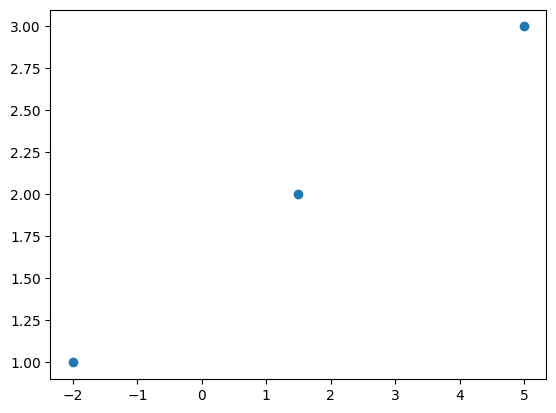

In [ ]:
import matplotlib.pyplot as plt
x_values = [5,-2,1.5]
y_values = [3,1,2]
plt.scatter(x_values,y_values)

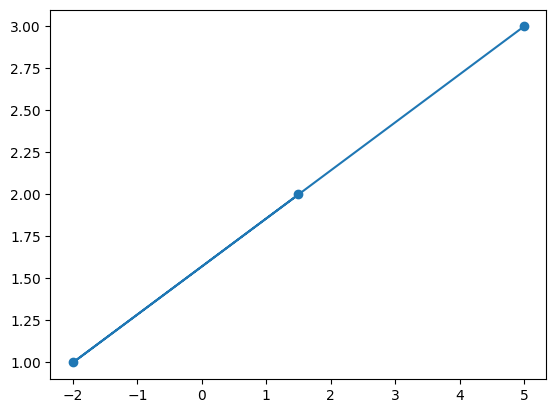

In [ ]:
plt.plot(x_values,y_values, marker="o")

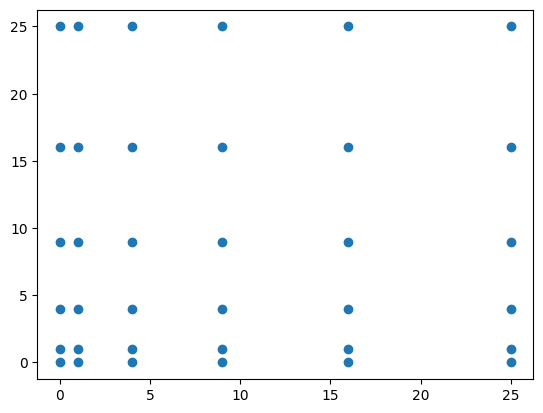

In [ ]:
points = [(x**2,y**2) for x in range(0,6) for y in range(0,6)]
plt.scatter([point[0] for point in points], [point[1] for point in points])

In [ ]:
from hypothesis import given, strategies as st

@given(st.integers())
def test_integers(n):
    print(f"called with {n}")
    assert isinstance(n, int)

test_integers()

called with0
called with129
called with12
called with14647
called with-6493714913397955032
called with-14079
called with16412
called with1129447163
called with34418
called with55
called with-79
called with654
called with-9482
called with-112
called with-7841
called with744986461
called with-10063
called with20367
called with-13144
called with-25929
called with5364150508216762480
called with-2962
called with-2380
called with-11361
called with83
called with-83330843444285139837514417829946227757
called with20184
called with3770
called with-4523
called with13215
called with-24319
called with-8092
called with-17323
called with71
called with6848
called with-103
called with-64
called with16842
called with-5102
called with-10584
called with-669230069
called with28959
called with23
called with32202
called with23932
called with102
called with263
called with37294
called with21795
called with-100
called with7259
called with-3092
called with17
called with18692
called with-91
called with-7690849053

In [ ]:
vectors = [(x,y) for x in range(0,20) for y in range(0,20)]
@given(v1=st.tuples(st.integers(max_value=20), st.integers(max_value=20)),
       v2=st.tuples(st.integers(max_value=20), st.integers(max_value=20)))
def test_transformation(v1, v2):
    assert add(v1**2, v2**2) == add(v1, v2)**2

test_transformation()

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

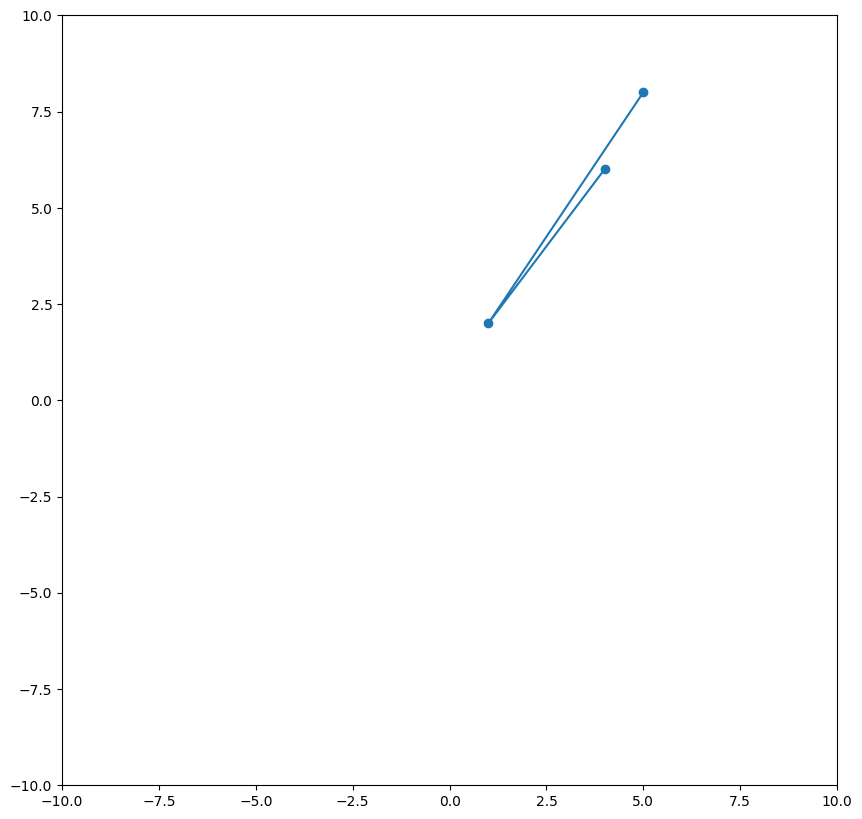

In [ ]:
#exercise 4.16
import sys
sys.path.insert(0, )
vectors = [(4,6), (1,2), add((4,6),(1,2))]
plt.ylim(-10,10)
plt.xlim(-10,10)
plt.gcf().set_size_inches(10,10)
plt.axis([-10,10,-10,10])
plt.plot([vector[0] for vector in vectors], [vector[1] for vector in vectors],
          marker="o")


#exercise 4.17
S and T are both linear transformations.
That means that for any vectors v and u,
    S(v)+S(u)=S(v+u), and S(sv)=sS(v)
Now, S(v) is a vector w, and S(u) is a vector t
Substituting, we have due to T being linear:
    T(S(v))+T(S(u))=T(S(v+u)) = T(w) + T(t) = T(w+t), which is just the
    composition of S and T.
Now, we also have:
    S(sv)=sw
Since T is linear, we have
    T(sw)=sT(w), which is also the composition of S and T. QED


In [ ]:
def linear_combination(scalars, *vectors):
    return add(*[scale(scalars[i], vectors[i]) for i in range(len(scalars))])

linear_combination([1,2,3], (1,0,0), (0,1,0), (0,0,1))

(1, 2, 3)

In [59]:
def transform_standard_basis(transform):
    unit_vectors = ((1,0,0), (0,1,0), (0,0,1))
    return tuple(map(transform, unit_vectors))

transform_standard_basis(scale2)

((2.0, 0.0, 0.0), (0.0, 2.0, 0.0), (0.0, 0.0, 2.0))